In [ ]:
from gurobipy import GRB
import gurobipy as gb
import numpy as np

# WEEK 2 - JAN 14

### Transportation Example

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("Transportation Problem")

# A list of list of costs
costs = [[21, 50, 40], [35, 30, 22], [55, 20, 25]]
supply = [275000, 400000, 300000]
demand = [200000, 600000, 225000]

# Create the a single class of decision variables
x = model.addVars(3, 3, lb=0, vtype=GRB.CONTINUOUS, name="Transportation Plan")

# The objective function
model.setObjective(gb.quicksum(costs[i][j]*x[i,j] for i in range(3) for j in range(3)), GRB.MINIMIZE)

# Add the supply constraints
for i in range(3):
    model.addConstr(gb.quicksum(x[i,j] for j in range(3)) == supply[i], name="Supply Constraint %i" %i)

# Add the demand constraints
for j in range(3):
    model.addConstr(gb.quicksum(x[i,j] for i in range(3)) <= demand[j], name="Demand Constraint %i" %j)

# Optimally solve the problem
model.optimize()

# Number of variables in the model
print("Number of Decision Variables: ", model.numVars)

# Value of the objective function
print("Total Transportation cost: ", model.objVal)

# Print the decision variables
print(model.printAttr('X'))

### Transshipment Example

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("Transshipment Problem")

# A list of list of costs
source_costs = [[11, 10, 26, 29], [9, 12, 27, 26]]
trans_costs = [[12, 16], [13, 15]]

# Create the a single class of decision variables where
# From = {𝑫𝒂,𝑯𝒐} and To = {𝑪𝒉,𝑳𝑨,𝑺𝑭,𝑵𝒀}.
x = model.addVars(2, 4, lb=0, vtype=GRB.CONTINUOUS, name="Source Nodes")
# From = {𝑪𝒉,𝑳𝑨} and To = {𝑺𝑭,𝑵𝒀}.
y = model.addVars(2, 2, lb=0, vtype=GRB.CONTINUOUS, name="Transshipment Nodes")

# The objective function
source_objective = gb.quicksum(source_costs[i][j]*x[i,j] for i in range(2) for j in range(4))
trans_objective = gb.quicksum(trans_costs[i][j]*y[i,j] for i in range(2) for j in range(2))
model.setObjective(source_objective + trans_objective, GRB.MINIMIZE)

# Add the supply constraints from source nodes
model.addConstr(gb.quicksum(x[0,j] for j in range(4)) <= 200, name="Supply Constraint 1")
model.addConstr(gb.quicksum(x[1,j] for j in range(4)) <= 160, name="Supply Constraint 2")
    
# Add the supply constraints from transshipment nodes
model.addConstr(gb.quicksum(x[i,0] for i in range(2)) <= 90, name="Transship Capacity 1")
model.addConstr(gb.quicksum(x[i,1] for i in range(2)) <= 80, name="Transship Capacity 2")

# Add the flow balance constrainits
model.addConstr(gb.quicksum(x[i,0] for i in range(2)) == gb.quicksum(y[0,k] for k in range(2)), name="Flow Balance 1")
model.addConstr(gb.quicksum(x[i,1] for i in range(2)) == gb.quicksum(y[1,k] for k in range(2)), name="Flow Balance 2")

# Add the demand constraints
model.addConstr(gb.quicksum(x[i,2] + y[i,0] for i in range(2)) == 140, name="Demand Constraint 1")
model.addConstr(gb.quicksum(x[i,3] + y[i,1] for i in range(2)) == 140, name="Demand Constraint 2")

# Ratio constraint
model.addConstr(0.6*gb.quicksum(y[i,j] for i in range(2) for j in range(2)) <= 0.4*gb.quicksum(x[i,j] for i in range(2) for j in range(2,4)), name="Ratio constraint")

# Optimally solve the problem
model.optimize()

# Number of variables in the model
print("Number of Decision Variables: ", model.numVars)

# Value of the objective function
print("Total Transportation cost: ", source_objective.getValue() + trans_objective.getValue())
print("Total Transportation cost: ", model.ObjVal)

# Print the decision variables
print(model.printAttr('X'))

# WEEK 3 - JAN 21

### Crop Allocation

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# The parameters
oat_yield = 4.25
maize_yield = 3.0
soybean_yield = 20.0

# Number of options
CROPS = 3
PURCHASED = 2
SOLD = 4

# Selling prices
sell = [220, 260, 55, 26]
purchase = [264, 312]

# Create a new optimization model to maximize profit
model = gb.Model("Farming Problem")

# Construct the decision variables.
x = model.addVars(3, lb=0, vtype=GRB.CONTINUOUS, name="Crops")
w = model.addVars(4, lb=0, vtype=GRB.CONTINUOUS, name="Sold")
y = model.addVars(2, lb=0, vtype=GRB.CONTINUOUS, name="Purchased")

# Objective Function
model.setObjective(gb.quicksum(w[i]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i]*purchase[i] for i in range(PURCHASED)), GRB.MAXIMIZE)

# Land capacity constraints 
land_constraint = model.addConstr(x[0] + x[1] + x[2] <= 500, "Land Capacity")

# Cattle feed constraints (oats)
cattle_constraint = model.addConstr(oat_yield*x[0] + y[0] - w[0] >= 200, "Oats")

# Cattle feed constraints (Maize)
oat_constraint = model.addConstr(maize_yield*x[1] + y[1] - w[1] >= 260, "Oats")

# Quota constraints (Soybean)
model.addConstr(w[2] <= 7000, "Quota")
soy_constraint = model.addConstr(w[2] + w[3] == soybean_yield*x[2], "Soybean")

# Solve our model
model.optimize()

# Append the objective function value
print("The optimal solution: ", model.objVal)
    
# Check if the optimization was successful
if model.status == gb.GRB.OPTIMAL:
    # Print the sensitivity analysis for the amount sold
    print("Optimal Amount Sold:")
    print(f"{'Oats'} = {w[0].x, w[0].RC, sell[0], w[0].SAObjUp, w[0].SAObjLow}")
    print(f"{'Maize'} = {w[1].x, w[1].RC, sell[1], w[1].SAObjUp, w[1].SAObjLow}")
    print(f"{'Soybean'} = {w[2].x, w[2].RC, sell[2], w[2].SAObjUp, w[2].SAObjLow}")
    print(f"{'Soybean'} = {w[3].x, w[3].RC, sell[3], w[3].SAObjUp, w[3].SAObjLow}")
else:
    print("Optimization was not successful.")

# Print sensitivity information
print("")
print(f"Sensitivity Information for Land Capacity Constraint {land_constraint.pi:.2f}:")
print("(LHS, RHS, Slack): ", (model.getRow(land_constraint).getValue(), land_constraint.RHS, land_constraint.slack))
print("Shadow Price: ", land_constraint.pi)
print("Range of Feasibility: ", (land_constraint.SARHSUp, land_constraint.SARHSLow))


### Dual Problem

In [ ]:
import gurobipy as gb

# Create a new optimization model for the dual problem
model = gb.Model("Dual Problem")

# Dual variables
y1 = model.addVar(lb=0, vtype=gb.GRB.CONTINUOUS, name="y1")
y2 = model.addVar(lb=0, vtype=gb.GRB.CONTINUOUS, name="y2")
y3 = model.addVar(lb=0, vtype=gb.GRB.CONTINUOUS, name="y3")

# Set the objective function to minimize
model.setObjective(4*y1 + 13*y2 + 31*y3, gb.GRB.MINIMIZE)

# Add constraints
dual_constraint1 = model.addConstr(y1 + y2 + 5*y3 >= 5, "Dual_Constraint1")
dual_constraint2 = model.addConstr(2*y2 + 3*y3 >= 4, "Dual_Constraint2")

# Optimize the dual model
model.optimize()

# Check if the optimization was successful
if model.status == gb.GRB.OPTIMAL:
    # Get the optimal solution and objective value for the dual problem
    optimal_y1 = y1.x
    optimal_y2 = y2.x
    optimal_y3 = y3.x
    optimal_dual_objective_value = model.objVal

    # Print the results
    print("Optimal Dual Solution:")
    print(f"y1 = {optimal_y1}")
    print(f"y2 = {optimal_y2}")
    print(f"y3 = {optimal_y3}")
    print("Optimal Dual Objective Value:")
    print(f"Dual z = {optimal_dual_objective_value}")
    
    # These should equal the optimal solution to the primal problem
    print("Shadow Prices: ", (dual_constraint1.pi, dual_constraint2.pi))
else:
    print("No feasible solution found for the dual problem.")


### Dual Tower Research

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the dual model
dual_model = gb.Model("Tower Research Dual")

# Add dual variables
y = dual_model.addVars(4, vtype=GRB.CONTINUOUS, name="y")
z = dual_model.addVars(3, lb=0, vtype=GRB.CONTINUOUS, name="z")

# Objective function
dual_obj = 3800 * y[0] - 400 * y[1] + 1588 * y[2] + 2000 * y[3] + 3000 * z[0] + 3000 * z[1] + 3000 * z[2]
# dual_obj = 3800 * y[0] + 400 * y[1] - 1588 * y[2] - 2000 * y[3] + 3000 * z[0] + 3000 * z[1] + 3000 * z[2]
dual_model.setObjective(dual_obj, GRB.MINIMIZE)

# Constraints linking periods
dual_model.addConstr(y[0] - y[1] >= 0, "C1")
dual_model.addConstr(y[1] - y[2] >= 0, "C2")
dual_model.addConstr(y[2] - y[3] >= 0, "C3")
dual_model.addConstr(y[3] >= 1, "C3")

# Borrowing constraints across periods
dual_model.addConstr(-y[0] + 1.03 * y[1] + z[0] >= 0, "B1")
dual_model.addConstr(-y[1] + 1.03 * y[2] + z[1] >= 0, "B2")
dual_model.addConstr(-y[2] + 1.03 * y[3] + z[2] >= 0, "B3")

# Investment growth constraints
dual_model.addConstr(y[0] - 1.02 * y[2] >= 0, "I1")
dual_model.addConstr(y[1] - 1.02 * y[3] >= 0, "I2")

# Solve the dual model
dual_model.optimize()

# Output the solution
print("Optimal value (dual):", dual_model.objVal)

### Primal Problem

In [ ]:
import gurobipy as gb

# Create a new optimization model
model = gb.Model("Primal Problem")

# Decision variables
x1 = model.addVar(lb=0, vtype=gb.GRB.CONTINUOUS, name="x1")
x2 = model.addVar(lb=0, vtype=gb.GRB.CONTINUOUS, name="x2")

# Set the objective function to maximize
model.setObjective(5*x1 + 4*x2, gb.GRB.MAXIMIZE)

# Add constraints
constraint1 = model.addConstr(x1 <= 4, "Constraint1")
constraint2 = model.addConstr(x1 + 2*x2 <= 13, "Constraint2")
constraint3 = model.addConstr(5*x1 + 3*x2 <= 31, "Constraint3")

# Optimize the model
model.optimize()

# Check if the optimization was successful
if model.status == gb.GRB.OPTIMAL:
    # Get the optimal solution and objective value
    optimal_x1 = x1.x
    optimal_x2 = x2.x
    optimal_objective_value = model.objVal

    # Print the results
    print("Optimal Solution:")
    print(f"x1 = {optimal_x1}")
    print(f"x2 = {optimal_x2}")
    print("Optimal Objective Value:")
    print(f"z = {optimal_objective_value}")
    
    # These should equal the optimal solution to the dual problem
    print("Shadow Prices: ", (constraint1.pi, constraint2.pi, constraint3.pi))
else:
    print("No feasible solution found.")

# WEEK 4 - JAN 28

### Craft Beer Optimization

In [ ]:
from gurobipy import GRB
import gurobipy as gb


# Maximum difference between inventory positions of the warehouses 
max_diff = 1200

# The supply nodes (i.e., the warehouses)
W = 2

# Creates a list that has the number of units of supply for each supply node
supply = [7000, 8000]

# The demand nodes
B = 7

# Creates a list for the number of units of demand for each demand node
demand = [1000, 1800, 3600, 400, 1400, 2500, 2000]

# Creates a list of lists associated with the costs of each transportation path.
# From warehouse i = {A,B} to bar j = {1,2,3,4,5,6,7}. 
costs = [
         #Bars: 1 2 3 4 5 6 7
         [2.00,4.00,5.00,2.00,1.00,2.50,1.90],#A   Warehouses
         [3.00,1.00,3.00,2.00,3.00,1.75,1.60] #B
        ]

# Instantiate our optimization problem in
model = gb.Model("Linearize Absolute Value Constraint")

#Construct decision variables for each class of decision variables
x = model.addVars(W, B, lb = 0, vtype=GRB.INTEGER, name="Transportation")

# Add the objective function to the optimization problem 
model.setObjective(gb.quicksum(x[w,b]*costs[w][b] for w in range(W) for b in range(B)), GRB.MINIMIZE)

# The demand minimum constraints are added to the milp variable for each demand node (bar)
model.addConstrs(gb.quicksum(x[w,b] for w in range(W)) == demand[b] for b in range(B))

# The supply maximum constraints are added to the milp variable for each supply node (warehouse)
model.addConstrs(gb.quicksum(x[w,b] for b in range(B)) <= supply[w] for w in range(W))
                   
# The absolute value of the difference in the inventory supplied to the bars
# model.addConstr(abs(gb.quicksum(x[0,b] for b in range(B)) - gb.quicksum(x[1,b] for b in range(B)))  <= max_diff)
model.addConstr(gb.quicksum(x[0,b] for b in range(B)) - gb.quicksum(x[1,b] for b in range(B))  <= max_diff)
model.addConstr(gb.quicksum(x[1,b] for b in range(B)) - gb.quicksum(x[0,b] for b in range(B))  <= max_diff)

# Optimally solve the problem
model.optimize()

# Each of the variables is printed with it's resolved optimum value
total_supply = [0,0]
for v in model.getVars():    
    if ("[0," in v.varName):
        total_supply[0] += v.x
    else: 
        total_supply[1] += v.x

# The optimized objective function value is printed to the screen    
print("Total Cost of Transportation = ", model.objVal)
print("Supply from Warehouse A = ", total_supply[0])
print("Supply from Warehouse B = ", total_supply[1])
print("Supply Difference = ", abs(total_supply[0]-total_supply[1]))

### Pricing Optimization

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Create a new Gurobi model
model = gp.Model("Quadratic_Optimization")

# Decision variables: p1 and p2 (continuous variables)
p1 = model.addVar(vtype=GRB.CONTINUOUS, name="p1", lb=0)
p2 = model.addVar(vtype=GRB.CONTINUOUS, name="p2", lb=0)

# Define the objective function
objective = p1 * (35234 - 26*p1) + p2 * (27790 - 9*p2)
model.setObjective(objective, GRB.MAXIMIZE)

# Add the demand constraints
model.addConstr(35234 - 26*p1 >= 0, name="Demand_Constraint_1")
model.addConstr(27790 - 9*p2 >= 0, name="Demand_Constraint_2")

# Add the pricing constraint
model.addConstr(p2 >= 550 + p1, name="Pricing_Constraint")

# Optimize the model
model.optimize()

# Output the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal value of p1: {p1.X}")
    print(f"Optimal value of p2: {p2.X}")
    print(f"Optimal objective value (Z): {model.objVal}")
else:
    print("No optimal solution found.")

# WEEK 5 - FEB 4

### Student Ridge Regression

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np

# Load the training data
train_file = "/Users/michaelnguyen/Desktop/OMIS 6000 F - Operational Research/Student Ridge Regression - Training Data.xlsx"
train_data = pd.read_excel(train_file, engine='openpyxl')

# Define the features and outcome columns
y_train = train_data['Grade'].values                 # outcomes
X_train = train_data.drop(columns=['Grade']).values  # feature matrix
N, J = X_train.shape                                 # number of training instances (N) and features (J)

# Budget constraint for regularization
t = 0.01

# Create a new Gurobi model
model = gp.Model("Ridge Regression")

# Add decision variables: alpha (scalar), beta (vector of length J), u_i (vector of length N), v_i (vector of length N)
alpha = model.addVar(vtype=GRB.CONTINUOUS, name="alpha")
beta = model.addVars(J, vtype=GRB.CONTINUOUS, name="beta")

# Set the objective function as the squared error between predicted and actual
# model.addConstrs(predicted[i] ==  for i in range(N)) 
objective = (1.0 / N) * gp.quicksum( (y_train[i] - alpha - gp.quicksum(beta[j] * X_train[i, j] for j in range(J)))**2 for i in range(N))
model.setObjective(objective, GRB.MINIMIZE)

# Regularization constraint
budget = model.addConstr(gp.quicksum(beta[j]*beta[j] for j in range(J)) <= t)

# Optimize the model
model.optimize()

# Extract the optimal values of alpha and beta
alpha_opt = alpha.X
beta_opt = np.array([beta[j].X for j in range(J)])
mean_grade = np.mean(y_train)

print(f"Optimal alpha: {alpha_opt}")
print(f"Optimal beta: {beta_opt}")

lhs = sum(beta[j].X ** 2 for j in range(J))
print(f'Budget constraint slack: {t - lhs}')

# Load the testing data
test_file = "/Users/michaelnguyen/Desktop/OMIS 6000 F - Operational Research/Student Ridge Regression - Testing Data.xlsx"
test_data = pd.read_excel(test_file, engine='openpyxl')

# Define the features and outcome columns for testing data
y_test = test_data['Grade'].values  # outcomes
X_test = test_data.drop(columns=['Grade']).values  # feature matrix

# Predict outcomes for the testing data
y_pred = alpha_opt + X_test.dot(beta_opt)

# Calculate Mean Absolute Deviation (MAD) and Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Mean Squared Error (MSE) on benchmark
mse_bench = np.mean((y_test - mean_grade) ** 2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Error (MSE) Benchmark: {mse_bench}")

### Variable Pricing

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Should we implement a variable pricing scheme?
isVariablePricing = True
isInteger = True

# Linear price response functions (intercept, slope)
response = [[3100, 62], [1900, 50], [1700, 40], [1710, 42], [2000, 53], [2500, 54], [3300, 60]]

# Create a new optimization model to maximize revenue
model = gb.Model("Variable Pricing Model")

# Construct the decision variables
if isInteger:
    p = model.addVars(7, lb=0, ub=40, vtype=GRB.INTEGER, name="Price")
    d = model.addVars(7, lb=0, ub=1100, vtype=GRB.INTEGER, name="Daily Demand")
else:
    p = model.addVars(7, lb=0, ub=40, vtype=GRB.CONTINUOUS, name="Price")
    d = model.addVars(7, lb=0, ub=1100, vtype=GRB.CONTINUOUS, name="Daily Demand")


#Objective Function
model.setObjective(gb.quicksum((p[n]-19)*d[n] for n in range(7)), GRB.MAXIMIZE)

# Demand is diverted from days of higher prices to days with lower prices
model.addConstrs((d[n] == response[n][0] - response[n][1]*p[n] + 9*gb.quicksum(p[m] - p[n] for m in range(7)) for n in range(7)), "Demand Constraint")
    
# If variable pricing is not allowed, we must add constraints to ensure that
# the price on each day of the week is the same. 
if not isVariablePricing:
    for n in range(6):
        model.addConstr(p[n] == p[n+1], "Equality Constraint %i" %n)
      
# Solve our model
model.optimize()

# Print the objective and decision variables
model.printAttr('X')


### Markdown Optimization

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Linear price response functions (intercept, slope)
snowsuit = [[80, 0.5], [80, 0.5], [30, 0.5], [30, 1.0]]
jacket = [[120, 0.7], [90, 0.9], [80, 1.0], [50, 0.9]]
snowpants = [[50, 0.8], [70, 0.4], [40, 0.4], [10, 0.4]]

# Create a new optimization model to maximize revenue
model = gb.Model("Markdown Optimization")

# Construct the decision variables
p = model.addVars(3, 4, lb=0, vtype=GRB.CONTINUOUS, name="Price")
d = model.addVars(3, 4, lb=0, vtype=GRB.INTEGER, name="Month Demand")

#Objective Function
model.setObjective(gb.quicksum(p[i,n]*d[i,n] for i in range(3) for n in range(4)), GRB.MAXIMIZE)

# Define the demand constraints
for n in range(4):
    model.addConstr(d[0,n] == snowsuit[n][0] - snowsuit[n][1]*p[0,n], "Demand Definition Snowsuits")
    model.addConstr(d[1,n] == jacket[n][0] - jacket[n][1]*p[1,n], "Demand Definition Jackets")
    model.addConstr(d[2,n] == snowpants[n][0] - snowpants[n][1]*p[2,n], "Demand Definition Snow Pants")

# Demand must not exceed the number we have in stock
model.addConstr(gb.quicksum(d[0,n] + d[1,n] for n in range(4)) <= 160, "Demand Constraint 1")
model.addConstr(gb.quicksum(d[0,n] + d[2,n] for n in range(4)) <= 160, "Demand Constraint 2")
    
# Prices must be marked down month-over-month
model.addConstrs((p[i,n] <= p[i,n-1] for i in range(3) for n in range(1,4)), "Markdown Constraint")
      
# Solve our model
model.optimize()

# Price of snowsuits 
print("Snowsuit Prices from January to April: \n", ['%.2f' % p[0,n].x for n in range(4)])
print("Jacket Prices from January to April: \n", ['%.2f' % p[1,n].x for n in range(4)])
print("Snow Pant Prices from January to April: \n", ['%.2f' % p[2,n].x for n in range(4)])

# WEEK 6 - FEB 11

### Personnel Selection

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("Personnel Selection")

# Create the one class of eight decision variables 
x = model.addVars(8, vtype=GRB.BINARY, name="Employee")

# Objective function coefficients
coef = [5, 9, 4, 3, 8, 7, 2, 6]

# The objective function
model.setObjective(gb.quicksum(coef[i]*x[i] for i in range(8)), GRB.MAXIMIZE)

# Add the constraints
model.addConstr(x[0] + x[1] <= 1, "Not Both #1")
model.addConstr(x[3] + x[4] <= 1, "Not Both #2")
model.addConstr(x[2] <= x[1], "If one then both")
model.addConstr(x[6] <= 1 - x[1], "If one then not")
model.addConstr(x[3] <= x[4] + x[5], "If one then another")
model.addConstr(2*x[5] <= x[6] + x[7], "If one then both")
model.addConstr(x[0] + x[1] + x[4] + x[5] + x[7] <= 3, "<= 3 employees")
model.addConstr(x[2] + x[3] + x[6] >= 2, ">= 2 employees")
    
# Optimally solve the problem
model.optimize()

# Print the objective and decision variables
model.printAttr('X')

# The status of the model
print("Model Status: ", model.status)


### Covering Problem

In [ ]:
import gurobipy as gb
from gurobipy import GRB

# Create a new model
model = gb.Model("Covering Problem")

# Variables
x = model.addVars(16, vtype=GRB.BINARY, name="Region")

# Objective function
objective = gb.quicksum(x[i] for i in range(16))
model.setObjective(objective, GRB.MINIMIZE)

# Constraints
model.addConstr(x[0] + x[1] + x[3] + x[4] >= 1, "Covering 1")
model.addConstr(x[0] + x[1] + x[2] + x[4] + x[5] >= 1, "Covering 2")
model.addConstr(x[1] + x[2] + x[5] + x[6] >= 1, "Covering 3")
model.addConstr(x[0] + x[3] + x[4] + x[7] + x[9] + x[10] >= 1, "Covering 4")
model.addConstr(x[0] + x[1] + x[3] + x[4] + x[5] + x[7] >= 1, "Covering 5")
model.addConstr(x[1] + x[2] + x[4] + x[5] + x[6] + x[7] + x[8] >= 1, "Covering 6")
model.addConstr(x[2] + x[5] + x[6] + x[8] + x[12] >= 1, "Covering 7")
model.addConstr(x[3] + x[4] + x[5] + x[7] + x[8] + x[10] + x[11] >= 1, "Covering 8")
model.addConstr(x[5] + x[6] + x[7] + x[8] + x[11] + x[12] >= 1, "Covering 9")
model.addConstr(x[3] + x[9] + x[10] + x[13] >= 1, "Covering 10")
model.addConstr(x[3] + x[7] + x[9] + x[10] + x[11] + x[13] >= 1, "Covering 11")
model.addConstr(x[7] + x[8] + x[10] + x[11] + x[12] + x[14] >= 1, "Covering 12")
model.addConstr(x[6] + x[8] + x[11] + x[12] + x[14] + x[15] >= 1, "Covering 13")
model.addConstr(x[9] + x[10] + x[13] + x[14] >= 1, "Covering 14")
model.addConstr(x[11] + x[12] + x[13] + x[14] + x[15] >= 1, "Covering 15")
model.addConstr(x[12] + x[14] + x[15] >= 1, "Covering 16")

# Optimize the model
model.optimize()

# Print the optimal solution
if model.status == GRB.OPTIMAL:
    print("Optimal solution:")
    for i, var in x.items():
        print(f"x{i} = {var.x}")
    
    print("Number of Fire Stations", model.ObjVal)
else:
    print("No solution found.")

### Project Investment

In [ ]:
import gurobipy as gb
from gurobipy import GRB

# Create a new model
model = gb.Model("Project Investment")

# Variables
x = model.addVars(6, vtype=GRB.BINARY, name="Project")

# Objective function
objective = 16 * x[0] + 22 * x[1] + 12 * x[2] + 8 * x[3] + 11 * x[4] + 19 * x[5]
model.setObjective(objective, GRB.MAXIMIZE)

# Constraints
model.addConstr(5 * x[0] + 7 * x[1] + 4 * x[2] + 3 * x[3] + 4 * x[4] + 6 * x[5] <= 14, "Cash_Constraint")
model.addConstr(x[0] + x[1] + x[2] + x[3] + x[4] + x[5] == 3, "Logical_Constraint1")
model.addConstr(x[1] <= x[0], "Logical_Constraint2")
model.addConstr(x[0] + x[2] <= 1, "Logical_Constraint3")
model.addConstr(x[3] + x[4] == 1, "Logical_Constraint4")
model.addConstr(x[0] + x[1] <= 1 + x[2], "Logical_Constraint5")
model.addConstr(1 <= x[5] + x[3] + x[4], "Logical_Constraint6")

# Optimize the model
model.optimize()

# Print the optimal solution
if model.status == GRB.OPTIMAL:
    print("Optimal objective value: ", model.objVal)
    print("Optimal solution:")
    for i, var in x.items():
        print(f"x{i} = {var.x}")
else:
    print("No solution found.")

### Assembly Line Scheduling

In [ ]:
import gurobipy as gb
from gurobipy import GRB

# Create a new model
model = gb.Model("Assembly Line Scheduling ")

# Variables
x = model.addVars(7, lb=0, vtype=GRB.INTEGER, name="Shift Variable")

# Objective function
objective = 680 * x[0] + 705 * x[1] + 705 * x[2] + 705 * x[3] + 705 * x[4] + 680 * x[5] + 655 * x[6]
model.setObjective(objective, GRB.MINIMIZE)

# Constraints
model.addConstr(x[2] + x[3] + x[4] + x[5] + x[6] >= 27, "Monday_Constraint")
model.addConstr(x[3] + x[4] + x[5] + x[6] + x[0] >= 22, "Tuesday_Constraint")
model.addConstr(x[4] + x[5] + x[6] + x[0] + x[1] >= 26, "Wednesday_Constraint")
model.addConstr(x[5] + x[6] + x[0] + x[1] + x[2] >= 25, "Thursday_Constraint")
model.addConstr(x[6] + x[0] + x[1] + x[2] + x[3] >= 21, "Friday_Constraint")
model.addConstr(x[0] + x[1] + x[2] + x[3] + x[4] >= 19, "Saturday_Constraint")
model.addConstr(x[1] + x[2] + x[3] + x[4] + x[5] >= 18, "Sunday_Constraint")

# Optimize the model
model.optimize()

# Print the optimal solution
if model.status == GRB.OPTIMAL:       
    print("Total Cost", model.ObjVal)          
    # Print the LHS of the constraints
    constraints = model.getConstrs()
    for con in constraints:
        print(f"LHS = {model.getRow(con).getValue()}, {con.RHS} = RHS")
    
else:
    print("No solution found.")


# WEEK 7 - FEB 25

### Tree Planting Initiative

In [ ]:
from gurobipy import GRB
import gurobipy as gb
import numpy as np

# The capacity at each hospital
locations = 36
costs = 0.05 + np.array([1.0/20*(i % 10) for i in range(1,locations+1)])

# Create a new optimization model to minimize the number of clusters
model = gb.Model("Tree Planting Program")

# Define the decision variables and the objective function
x = model.addVars(locations, lb=0, vtype=GRB.INTEGER, name="Trees")
y = model.addVars(locations, vtype=GRB.BINARY, name="Locations")
model.setObjective(gb.quicksum(costs[i]*x[i] for i in range(locations)), GRB.MINIMIZE)

# At least 13 planting locations must be chosen in Ontario.
model.addConstr(gb.quicksum(y[i] for i in range(locations)) >= 13)

# Between 100,000 and 1,000,000 trees can be planted at any location if selected
model.addConstrs(x[i] >= 33111*y[i] for i in range(locations))
model.addConstrs(x[i] <= 668457*y[i] for i in range(locations))

# At most one planting location can be chosen amongst the sites 1, 10, and 20
model.addConstr(y[0] + y[9] + y[19] <= 1)

# No more than 4 planting locations must be chosen amongst the sites 2, 4, 6, 8, 12, 14, and 16
model.addConstr(y[1] + y[3] + y[5] + y[7] + y[11] + y[13] + y[15] <= 4)

# If planting location 30 is chosen then the sites 31 and 32 cannot be chosen.
model.addConstr(y[29] <= 1 - y[30])
model.addConstr(y[29] <= 1 - y[31])

# If planting location 21 is chosen then the sites 22 and 23 must be chosen.
model.addConstr(2*y[20] <= y[21] + y[22])

# The number of planting locations chosen from sites 1-18 must equal the number of planting locations chosen from sites 19-36
model.addConstr(gb.quicksum(y[i] for i in range(18)) == gb.quicksum(y[i] for i in range(18,locations)))

# The total number of 
model.addConstr(gb.quicksum(x[i] for i in range(locations)) == 10000000)

# Solve the integer program
model.optimize()

# Print the optimal solution
model.printAttr('X')

### Production and Transportation

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("Production and Transportation")

# Create three classes of five decision variables 
x = model.addVars(8, 8, lb=0, vtype=GRB.INTEGER, name="Shipping")
y = model.addVars(8, vtype=GRB.BINARY, name="Production Facility")
z = model.addVars(8, vtype=GRB.BINARY, name="Customer Served")

# Objective function coefficients
revenues = [75740, 44370, 46320, 87780, 43850, 21000, 74850, 83980]
quantity = [1430, 870, 770, 1140, 700, 830, 1230, 1070]
distance = [[0, 983, 1815, 1991, 3036, 1539, 213, 2664], [983, 0, 1205, 1050, 2112, 1390, 840, 1729], 
            [1815, 1205, 0, 801, 1425, 1332, 1604, 1027], [1991, 1050, 801, 0, 1174, 2065, 1780, 836],
            [3036, 2112, 1425, 1174, 0, 2757, 2825, 398], [1539, 1390, 1332, 2065, 2757, 0, 1258, 2359],
            [213, 840, 1604, 1780, 2825, 1258, 0, 2442], [2664, 1729, 1027, 836, 398, 2359, 2442, 0]]


# The objective function
revenue = gb.quicksum(revenues[i]*z[i] for i in range(8))
fixed_costs = 60000*gb.quicksum(y[i] for i in range(8))
production_costs = 10.25*gb.quicksum(x[i,j] for i in range(8) for j in range(8))
transportation_costs = 0.02*gb.quicksum(distance[i][j] * x[i,j] for i in range(8) for j in range(8))
model.setObjective(revenue - fixed_costs - production_costs - transportation_costs, GRB.MAXIMIZE)

# Add the constraints
for i in range(8):
    model.addConstr(gb.quicksum(x[i,j] for j in range(8)) <= 2500*y[i], "Resource Constraint %i" %i)
    
for j in range(8):
    model.addConstr(gb.quicksum(x[i,j] for i in range(8)) == quantity[j]*z[j], "Demand Constraint %i" %j)
      
# Optimally solve the problem
model.optimize()

# Print the objective and decision variables
model.printAttr('X')

# The contirbution of each source of costs
print("Revenue: ", revenue.getValue())
print("Fixed Costs: ", fixed_costs.getValue())
print("Production Costs: ", production_costs.getValue())
print("Transportation Costs: ", transportation_costs.getValue())

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# The status of the model
print("Model Status: ", model.status)

### Condo Construction

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("Condominium Construction")

# Create three classes of five decision variables 
x = model.addVars(7, lb=0, vtype=GRB.INTEGER, name="13-unit floors")
y = model.addVars(7, lb=0, vtype=GRB.INTEGER, name="26-unit floors")
z = model.addVars(7, vtype=GRB.BINARY, name="Site")

# Objective function coefficients
fixed = [3600139.42, 5490819.25, 4881866.51, 3840105.76, 4059055.94, 3394952.48, 5082906.08]
variable_13 = [145044.34, 535503.09, 203022.34, 229679.10, 283722.30, 919371.26, 996211.52]
variable_26 = [1388290.16, 970743.26, 658878.96, 481477.35, 696580.10, 207675.03, 94350.22]

# The objective function
fixed_costs = gb.quicksum(fixed[i]*z[i] for i in range(7))
variable_costs_13 = gb.quicksum(variable_13[i]*x[i] for i in range(7))
variable_costs_26 = gb.quicksum(variable_26[i]*y[i] for i in range(7))
model.setObjective(fixed_costs + variable_costs_13 + variable_costs_26, GRB.MINIMIZE)

# Add the constraints
model.addConstrs((x[i] + y[i] <= 12*z[i] for i in range(7)), "Max Unit Constraint")
model.addConstrs((x[i] + y[i] >= 4*z[i] for i in range(7)), "Min Unit Constraint")
model.addConstrs((x[i] >= 1.0/3*(x[i] + y[i]) for i in range(7)), "Planning Requirement")
model.addConstr(z[3] <= z[6], "Planning Requirement #1")
model.addConstr(z[1] <= z[2] + z[4], "Planning Requirement #2")
model.addConstr(z[0] + z[3] <= 1, "Planning Requirement #3")
model.addConstr(gb.quicksum(z[i] for i in range(7)) == 4, "Number of sites to build")
model.addConstr(gb.quicksum(13*x[i] + 26*y[i] for i in range(7)) >= 916, "Number of units to build")
    
# Optimally solve the problem
model.optimize()

# Print the objective and decision variables
model.printAttr('X')

# The contirbution of each source of costs
print("Fixed Costs: ", fixed_costs.getValue())
print("Variable (13-unit) Costs: ", '%.2f' % variable_costs_13.getValue())
print("Variable (26-unit) Costs: ", '%.2f' % variable_costs_26.getValue())

### Inhouse versus Outsourcing

In [ ]:
from gurobipy import GRB
import gurobipy as gb

# Create the optimization model
model = gb.Model("In-House vs. Outsourcing Manufacturing")

# Objective function coefficients
fixed = [1000, 1200, 1900, 1500, 1500]
produce = [0.4, 2.9, 3.15, 0.3, 0.55]
purchase = [0.65, 3.45, 3.7, 0.5, 0.7]

# The demand coefficients
D = [12000, 7000, 5000, 7000, 5000]

# Create three classes of five decision variables 
x = model.addVars(5, lb=0, vtype=GRB.CONTINUOUS, name="Manufacture")
y = model.addVars(5, vtype=GRB.BINARY, name="Toggle")
z = model.addVars(5, lb=0, vtype=GRB.CONTINUOUS, name="Outsource")

# The objective function
fixed_costs = gb.quicksum(fixed[i]*y[i] for i in range(5))
production_costs = gb.quicksum(produce[i]*x[i] for i in range(5))
purchase_costs = gb.quicksum(purchase[i]*z[i] for i in range(5))
model.setObjective(fixed_costs + production_costs + purchase_costs, GRB.MINIMIZE)

# Add the constraints
for i in range(5):
    model.addConstr(x[i] + z[i] == D[i], "Demand Constraint %i" %i)
    model.addConstr(x[i] <= D[i]*y[i], "Big-M Constraint %i" %i)
model.addConstr(0.9*x[0] + 2.2*x[1] + 3*x[2] + 0.8*x[3] + x[4] <= 30000, "Capacity Constraint")
    
# Optimally solve the problem
model.optimize()

# Print the objective and decision variables
model.printAttr('X')

# The contirbution of each source of costs
print("Fixed Costs: ", fixed_costs.getValue())
print("Production Costs: ", production_costs.getValue())
print("Purchase Costs: ", purchase_costs.getValue())

# WEEK 9 - MAR 11

### Sudoku Engine

In [ ]:
import gurobipy as gb
import matplotlib.pyplot as plt
import random

# How many feasible solutions to generate?
ONE_FEASIBLE = 10

# Create a new model
model = gb.Model("Sudoku Engine")

# Define the size of the Sudoku puzzle where box_size equals N
box_size = 3

# The total number of rows and columns on the board
grid_size = box_size * box_size 
rows = columns = values = range(1, grid_size + 1)

# Decision variables: Binary variable indicating whether a value is xed to a cell
x = model.addVars(rows, columns, values, vtype=gb.GRB.BINARY, name="Cell Value")

# Add Constraints

# Constraint: Each cell can only have one value
model.addConstrs(gb.quicksum(x[i, j, k] for k in values) == 1 for i in rows for j in columns)

# Constraint: Each value can only appear once in each row
model.addConstrs(gb.quicksum(x[i, j, k] for j in values) == 1 for i in rows for k in values)

# Constraint: Each value can only appear once in each column
model.addConstrs(gb.quicksum(x[i, j, k] for i in values) == 1 for j in columns for k in values)

# Constraint: Each value can only appear once in each box
model.addConstrs(gb.quicksum(x[1 + box_size * l + i, 1 + box_size * m + j, k] for i in range(box_size) for j in range(box_size)) == 1
     for l in range(box_size) for m in range(box_size) for k in values)


# Set the condition such that Gurobi continuous searching for feasible solutions
model.setParam('PoolSearchMode', 2)

# Set the number of feasible solutions that Gurobi should look for
model.setParam('PoolSolutions', ONE_FEASIBLE if ONE_FEASIBLE >= 2 else 1)

# Which of the feasible solutions should Gurobi return?
model.setParam('SolutionNumber', random.randrange(ONE_FEASIBLE if ONE_FEASIBLE >= 2 else 1))

# Optimize the model
model.optimize()

# Define the gameboard
cells = [(i, j, k) for i in values for j in values for k in values]

# Print the Sudoku puzzle
if model.status == gb.GRB.OPTIMAL:
    solution = [[0] * grid_size for _ in range(grid_size)]
    for i, j, k in cells:
        if x[i, j, k].xn > 0.5:
            solution[i - 1][j - 1] = k
    
    # Plot the Sudoku solution
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    
    for i in range(grid_size + 1):
        if i % box_size == 0:
            ax.axhline(i, lw=2, color='black')
            ax.axvline(i, lw=2, color='black')
        else:
            ax.axhline(i, lw=0.5, color='black')
            ax.axvline(i, lw=0.5, color='black')
    
    for i in range(grid_size):
        for j in range(grid_size):
            value = solution[i][j]
            if value != 0:
                ax.text(j + 0.5, grid_size - i - 0.5, value, ha='center', va='center', fontsize=10)
    plt.show()
    
else:
    print("No solution found.")

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# The time it takes to solve the model
print("Model Runtime (s): ", model.Runtime)

# How many feasible solutions were originally generated
print("Solution Count:", model.getAttr('SolCount'))

### Portfolio Optimization

Set parameter Username
Set parameter LicenseID to value 2610046
Academic license - for non-commercial use only - expires 2026-01-14
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 494 columns and 494 nonzeros
Model fingerprint: 0xd4b7df5f
Model has 122265 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 4e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 494 columns, 494 nonzeros
Presolved model has 122265 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 493
 AA' NZ     : 1.218e+05
 Factor NZ  : 1.223e+05 (roughly 2 MB of memory)
 Factor Ops : 4.031e+07 (less than 1 second per iteration)
 Threads    : 8

                  Objective     

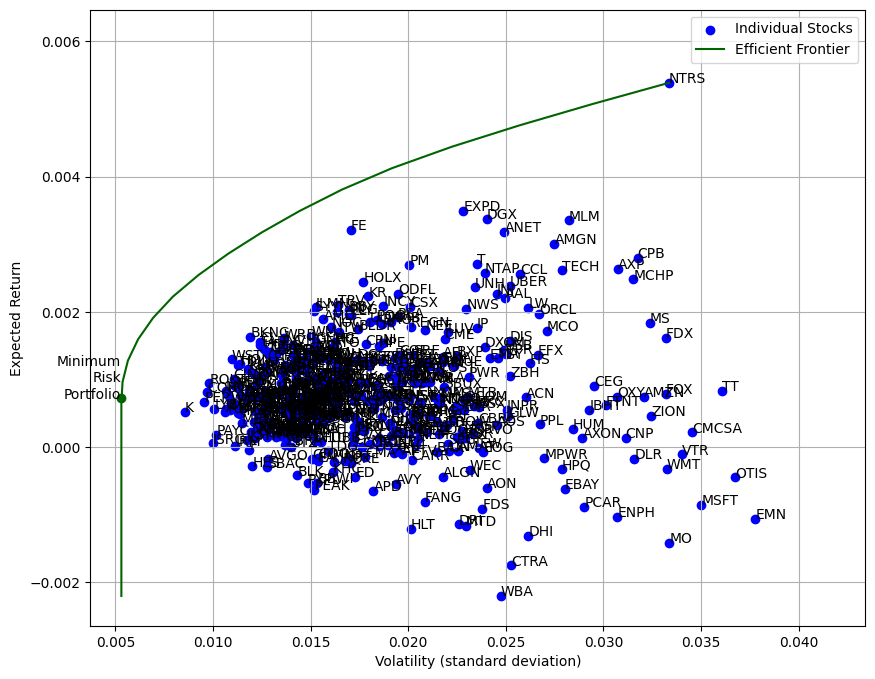

In [4]:
import matplotlib.pyplot as plt
from gurobipy import GRB
import gurobipy as gb
import pandas as pd
import numpy as np
from math import sqrt

# Compute minimum risk portfolio or efficient frontier?
FRONTIER = True


# Read the closing prices and ticker symbols
df = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/stock_closing_prices%20(1).csv")
symbols = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/symbols%20(1).csv")
stocks = symbols["Symbol"].values.tolist()

# Matrix of daily closing prices for each stock in the S&P 500
closes = np.transpose(np.array(df)) 

# The absolute change in daily closing prices for each stock on the S&P 500
absdiff = np.diff(closes)                   

# Compute the daily return for each stock on the S&P 500 by dividing the 
# absolute difference in closes prices by the starting share price. Note
# that this normalizes the return so it doesn't depend on share prices.
reldiff = np.divide(absdiff, closes[:,:-1]) 

# The mean return for each stoch on the S&P 500
mu = np.mean(reldiff, axis=1)

# The standard deviation of returns (diagonal of the covariance matrix)
std = np.std(reldiff, axis=1)               

# The convariance matrix associated with the returns 
sigma = np.cov(reldiff)                     

# Find the nan values for mu and std
nan_indices_mu = np.isnan(mu)
nan_indices_std = np.isnan(std)
nan_indices_combined = np.logical_or(nan_indices_mu, nan_indices_std) 

# Remove the nan values for mu, std, and sigma
mu = mu[~nan_indices_combined]
std = std[~nan_indices_combined]
sigma = sigma[~nan_indices_combined][:, ~nan_indices_combined]

# Create an empty optimization model
model = gb.Model('Portfolio Optimization')

# Add decision variables for the non-nan stocks
stock_index = range(len(mu))
x = model.addVars(stock_index, lb=0, vtype=gb.GRB.CONTINUOUS, name="Fraction")

# Objective is to minimize risk.  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = gb.quicksum(x[i]*x[j]*sigma[i,j] for i in stock_index for j in stock_index)
model.setObjective(portfolio_risk, GRB.MINIMIZE)

# The proportion constraints ensure we invest our entire portfolio
model.addConstr(gb.quicksum(x[i] for i in stock_index) == 1)

# Optimize model to find the minimum risk portfolio
model.optimize()

# Create an array of proportions which represent the optimal solution
x_flat = np.array([x[i].x for i in stock_index])

# Comptue the minimum risk of the portfolio as well as the expected return (daily)
minrisk_volatility = sqrt(model.objval)
minrisk_return = mu @ x_flat

# Convert the average daily values into a yearly value (251 working days).
# Then, convert these yearly values into a percentage.
number_of_days = len(closes[0])/2       # This equals 251
minrisk_return_out = minrisk_return*number_of_days*100
minrisk_volatility_out = minrisk_volatility*sqrt(number_of_days)*100

# Print the composition of the portfolio the minimizes the risk.
primary_investments = [i for i in range(len(mu)) if x_flat[i] > 0.01]
filtered_stocks = [stock for i, stock in enumerate(stocks) if not nan_indices_combined[i]]
for i in primary_investments:
    print(filtered_stocks[i], x_flat[i])
    
# Print out the return and volatility of the portfolio
print("Expected Yearly Return (%): ", minrisk_return_out)
print("Expected Yearly Volatility (%): ", minrisk_volatility_out)
    
# Did you want to compute the efficient frontier?
if FRONTIER:

    # Create an expression representing the expected return for the portfolio; add this as a constraint
    target = model.addConstr(gb.quicksum(mu[i]*x[i] for i in stock_index) >= minrisk_return, 'target')
    
    # Solve for efficient frontier by varying the mean return
    frontier = np.empty((2,0))
    for r in np.linspace(mu.min(), mu.max(), 25):
        target.rhs = r
        model.optimize()
        frontier = np.append(frontier, [[sqrt(model.objval)],[r]], axis=1)
    
    # Plot the efficient frontier
    fig, ax = plt.subplots(figsize=(10,8))
    
    # Plot volatility versus expected return for individual stocks
    ax.scatter(x=std, y=mu, color='Blue', label='Individual Stocks')
    for i, stock in enumerate(filtered_stocks):
        ax.annotate(stock, (std[i], mu[i]))
    
    # Plot volatility versus expected return for minimum risk portfolio
    ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
    ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return), horizontalalignment='right')
    
    # Plot efficient frontier
    ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')
    
    # Format and display the final plot
    ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, mu.min()*1.2, mu.max()*1.2])
    ax.set_xlabel('Volatility (standard deviation)')
    ax.set_ylabel('Expected Return')
    ax.legend()
    ax.grid()
    plt.show()

### Vehicle Routing

In [5]:
from gurobipy import GRB
import gurobipy as gb
import pandas as pd
import ast
from itertools import permutations

# ----------------------------------------------------------------------------------------
# Read the travel time data from the csv file
hubs = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/hubs.csv", converters={'key': ast.literal_eval})
time = dict(zip(hubs['key'], hubs['value']))

# Parameters including the number of vehicles, customers to visit, and total shift time.
vehicles = 4
customers_including_depot = 16
vans = range(vehicles)
locations = range(customers_including_depot) 
shift_time = 240

# Should we include subtour elmination constriants? 
# Notice what happens when we toggle this variable on and off.
INCLUDE_SUBTOUR = True
# ----------------------------------------------------------------------------------------
# Lazy Constraints

# Callback - use lazy constraints to eliminate sub-tours
# There are an exponential number of these constraints!
# Thus, we don't add them all to the model. Instead, we
# use a callback function to find violated subtour constraints 
# and add them to the model as lazy constraints.
def subtourelim(model, where):
    if where == GRB.Callback.MIPSOL:
        
        # Make a list of all pairs of nodes that are selected in the solution for all vans
        vals = model.cbGetSolution(model._x)
        selected = gb.tuplelist((i,j) for i, j, k in model._x.keys() if vals[i, j, k] > 0.5)
        
        # Find the shortest cycle (from hub to locations and back to the hub)
        tour = subtour(selected)
        
        # If the length of these tours does not 
        if len(tour) < customers_including_depot: 
            for k in vans:
                model.cbLazy(gb.quicksum(model._x[i, j, k] for i, j in permutations(tour, 2)) <= len(tour)-1)


# Given a tuplelist of edges, find the shortest subtour not containing depot (0)
def subtour(edges):
    # Track the locations that have not been visted
    unvisited = list(range(1, customers_including_depot))
    
    # A cycle should start and end at the depot
    cycle = range(customers_including_depot+1)
    
    # Iterate until there are no unvisited customers
    while unvisited:
        
        # Track the cycle associated with the unvisited nodes
        thiscycle = []
        neighbors = unvisited
        
        # Look to see who the next visited customer is in the the current tour
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            if current != 0:
                unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*') if j == 0 or j in unvisited]
        
        # If 0 is not contained in this tour, we must create a constraint that 
        # prevents this solution from occuring which is then added to the problem.
        if 0 not in thiscycle and len(cycle) > len(thiscycle):
            cycle = thiscycle
    return cycle

# ----------------------------------------------------------------------------------------
# Create a new model
model = gb.Model("Delivery Routing")

# Decision variables: Binary variables

# Equals 1 if van k visits location i and then goes to location j
x = model.addVars(locations, locations, vans, vtype=GRB.BINARY, name = "Routes")

# Equals 1 if location i is visited by van k
y = model.addVars(locations, vans, vtype=GRB.BINARY, name = "Locations")

# Equals 1 if van k is used
z = model.addVars(vans, vtype=GRB.BINARY, name = 'Vans')

# Define the objective function as minimizing the number of vans used
model.setObjective(gb.quicksum(z[k] for k in vans), gb.GRB.MINIMIZE)

# Add Constraints

# Constraint: If a van visits at least one location, it is used
model.addConstrs(y[i,k] <= z[k] for i in locations for k in vans if i > 0)

# Constraint: Travel time + service time (15 minutes per delivery) for each van must not exceed the shift time (minutes)
model.addConstrs(gb.quicksum(time[i,j]*x[i,j,k] for i in locations for j in locations if i != j) + 15*gb.quicksum(y[i,k] for i in locations if i > 0) <= shift_time for k in vans) 

# Constraint: Each customer must be visited
model.addConstrs(gb.quicksum(y[i,k] for k in vans) == 1 for i in locations if i > 0)

# Constraint: Each van must visit the depot if it is in use
model.addConstrs(y[0,k] == z[k] for k in vans)

# Constraint: If a van k arrives at location j, it has come from some location i
model.addConstrs(gb.quicksum(x[i,j,k] for i in locations) == y[j,k] for j in locations for k in vans)

# Constraint: If a van k leaves location j, it must be going to location i
model.addConstrs(gb.quicksum(x[i,j,k] for j in locations) == y[i,k] for i in locations for k in vans)

# Constraint: The van cannot travel between the same location
model.addConstrs(x[i,i,k] == 0 for i in locations for k in vans)

# Optimize the model using lazy constraints
if INCLUDE_SUBTOUR:
    model._x = x
    model.Params.LazyConstraints = 1
    
    # During the optimization, the "callback" function will be called periodically.
    # You can see how many times it was called by looking at "User-callback calls" in the output.
    model.optimize(subtourelim)
else:
    model.optimize()

# Retrieve the optimal solution
if model.status == gb.GRB.OPTIMAL:
    # Print optimal routes for each van
    for k in vans:
        route = gb.tuplelist((i,j) for i,j in time.keys() if x[i,j,k].X > 0.5)
        if route:
            i = 0
            print(f"Route for van {k}: {i}", end='')
            while True:
                i = route.select(i, '*')[0][1]
                print(f" -> {i}", end='')
                if i == 0:
                    break
        else:
            print(f"Route for van {k}:", end='')
        print("")
else:
    print("No solution found.")

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# Value of the objective
print("Number of vans: ", model.objval)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
LazyConstraints  1

Optimize a model with 275 rows, 1092 columns and 3448 nonzeros
Model fingerprint: 0xaf1dcb7c
Variable types: 0 continuous, 1092 integer (1092 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 68 rows and 68 columns
Presolve time: 0.01s
Presolved: 207 rows, 1024 columns, 3164 nonzeros
Variable types: 0 continuous, 1024 integer (1024 binary)

Root relaxation: objective 1.000000e+00, 236 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   

### Cutting Stock IP

In [6]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

# Load the data from the CSV file
data_file = 'https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cutting_stock_data.csv'
data = pd.read_csv(data_file)

# Extract the order lengths and demands from the CSV file
order_lens = data['Order_Length'].values
demands = data['Demand'].values
num_orders = len(order_lens)
total_demand = np.sum(demands)

# Set the roll length to the maximum order length (to ensure feasibility)
roll_len = max(order_lens)

# Create Gurobi model
model = gp.Model("Cutting_Stock_Optimization")

# Set ranges (rolls and orders)
rolls = range(total_demand)
orders = range(num_orders)

# Decision variables
# Binary variable for whether a roll is used (1 if used, 0 otherwise)
x = model.addVars(rolls, vtype=GRB.BINARY, obj=np.ones(total_demand), name="X")

# Integer variable for how much of each order is cut from each roll
y = model.addVars(orders, rolls, vtype=GRB.INTEGER, obj=np.zeros((num_orders, total_demand)), name="Y")

# Direction of optimization: Minimization
model.modelSense = GRB.MINIMIZE

# Demand satisfaction constraint: Each order's demand must be satisfied exactly
model.addConstrs((y.sum(i, '*') == demands[i] for i in orders), "Demand")

# Roll length constraint: The sum of order lengths assigned to a roll cannot exceed the roll length
for j in rolls:
    model.addConstr(sum(y[i, j] * order_lens[i] for i in orders) <= roll_len, f"Length[{j}]")

# Linking constraint: Ensure that orders are assigned to a roll only if the roll is used
for i in orders:
    for j in rolls:
        model.addConstr(y[i, j] <= x[j] * demands[i])

# Optimize the model
model.optimize()

# Extract the solution
if model.status == GRB.OPTIMAL:
    used_rolls = [j for j in rolls if x[j].x > 0.5]
    print(f'Maximum Rolls: {total_demand}')
    print(f'Number of Orders: {num_orders}')
    print(f'Standard Roll Size: {roll_len}')
    print(f'Objective: {model.objVal}')
    

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3871 rows, 3856 columns and 14460 nonzeros
Model fingerprint: 0x040e7f10
Variable types: 0 continuous, 3856 integer (241 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+00, 4e+01]
Presolve removed 2169 rows and 0 columns
Presolve time: 0.01s
Presolved: 1702 rows, 3856 columns, 12291 nonzeros
Variable types: 0 continuous, 3856 integer (2651 binary)
Found heuristic solution: objective 241.0000000
Found heuristic solution: objective 240.0000000
Found heuristic solution: objective 239.0000000
Found heuristic solution: objective 193.0000000
Found heuristic solution: objective 192.0000000

Root relaxation: objective 1.530000e+02, 1594 iterations, 0.05 seconds (0.02 work units)

    No

### Cutting Stock CG

In [8]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np

# Load instance data from CSV
def load_instance_from_csv(csv_file):
    data = pd.read_csv(csv_file)
    
    # Extract the order lengths and demands from the CSV file
    order_lens = data['Order_Length'].values
    roll_len = max(order_lens)
    demands = data['Demand'].values
    num_orders = len(order_lens)
    return roll_len, order_lens, demands, num_orders

# Main function to run column generation algorithm iterating between master/subproblem
def column_generation_and_solve(roll_len, order_lens, demands):    
    # Generate initial patterns (one per order, filling as much as possible)
    patterns = []
    for i in range(len(order_lens)):
        pattern = list(np.zeros(len(order_lens)).astype(int))
        pattern[i] = int(roll_len / order_lens[i])
        patterns.append(pattern)

    # Column generation loop
    while True:
        
        # These details change because in each iteration, we have one more pattern
        n_pattern = len(patterns)
        pattern_range = range(n_pattern)
        order_range = range(len(order_lens))
        patterns_np = np.array(patterns, dtype=int)

        # Master problem setup
        master_problem = gp.Model("master_problem")
        
        # We have to define it like this (with a subscript) because there are lambda functions 
        # in Python (https://realpython.com/python-lambda/). There is one variable per pattern.
        lambda_ = master_problem.addVars(pattern_range, vtype=GRB.CONTINUOUS, lb = 0, name="lambda")

        # Demand satisfaction constraints
        for i in order_range:
            master_problem.addConstr(sum(patterns_np[p, i] * lambda_[p] for p in pattern_range) == demands[i], "Demand[%d]" % i)

        # Objective: minimize the number of rolls used 
        master_problem.setObjective(gp.quicksum(lambda_[p] for p in pattern_range), GRB.MINIMIZE)
        master_problem.optimize()        

        # Retrieve the dual information from the demand constraints
        duals = np.array([constraint.pi for constraint in master_problem.getConstrs()])

        # Solve subproblem (pricing problem)
        subproblem = gp.Model("subproblem")
        a = subproblem.addVars(order_range, vtype=GRB.INTEGER, lb=0, name="a")
       
        # The feasible length constraint
        subproblem.addConstr(sum(order_lens[i] * a[i] for i in order_range) <= roll_len)
        
        # Find the most negative reduced cost
        subproblem.setObjective(gp.quicksum(duals[i]*a[i] for i in order_range), GRB.MAXIMIZE)
        subproblem.optimize()

        # Check if new pattern has a reduced cost > -1 (i.e., stop condition) which implies that z > 1.
        # If not, stop the column generation loop
        if subproblem.objVal < 1 + 0.001:
            break

        # Add new pattern to the master problem
        new_pattern = [int(a[i].x) for i in order_range]
        patterns.append(new_pattern)

    # Solve the final integer master problem
    return patterns

# Solve the final master problem as an integer programming problem with the subset of
# patterns obtained from the column generation loop
def solve_integer_master_problem(patterns, order_lens, demands, roll_len):
    n_pattern = len(patterns)
    pattern_range = range(n_pattern)
    order_range = range(len(order_lens))
    patterns_np = np.array(patterns, dtype=int)

    # Integer Master Problem setup
    int_master_problem = gp.Model("integer_master_problem")
    lambda_int = int_master_problem.addVars(pattern_range, vtype=GRB.INTEGER, lb = 0, name="lambda_int")

    # Demand satisfaction constraints
    for i in order_range:
        int_master_problem.addConstr(sum(patterns_np[p, i] * lambda_int[p] for p in pattern_range) >= demands[i], "Demand[%d]" % i)

    # Objective: minimize the number of rolls used (integer version)   
    int_master_problem.setObjective(gp.quicksum(lambda_int[p] for p in pattern_range), GRB.MINIMIZE)
    int_master_problem.optimize()        

    # Print the solution
    print("\nFinal Integer Solution (Roll Usage):")
    for p in pattern_range:
        if lambda_int[p].x > 0:
            print(f"Pattern {p}: Used {int(lambda_int[p].x)} times")

    return int_master_problem.objVal


# Script to read data and solve the problem
if __name__ == "__main__":
    # Load instance from CSV (CSV format: roll_len, order_len, demand columns)
    csv_file = "https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cutting_stock_data.csv"
    roll_len, order_lens, demands, num_orders = load_instance_from_csv(csv_file)
    
    # Run column generation and solve the final integer problem
    patterns = column_generation_and_solve(roll_len, order_lens, demands)
    
    # Once we cannot find any more cost-reducing patterns, solve the final integer program with
    # only the subset of patterns that we have already found.
    final_patterns = solve_integer_master_problem(patterns, order_lens, demands, roll_len)
    print(f'Number of Orders: {num_orders}')
    print(f'Standard Roll Size: {roll_len}')
    print(f'Objective: {final_patterns }')

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 15 rows, 15 columns and 15 nonzeros
Model fingerprint: 0xd676240c
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 2e+01]
Presolve removed 15 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9700000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.970000000e+02
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 15 columns and 15 nonzeros
Model fin

# WEEK 10 - MAR 18

### Crop Allocation - VSS

In [9]:
from gurobipy import GRB
import gurobipy as gb

# Create a new optimization model to maximize profit
model = gb.Model("Farming Problem")

# Number of options
CROPS = 3
PURCHASED = 2
SOLD = 4

# Selling prices
sell = [220, 260, 55, 26]
purchase = [264, 312]

# Construct the decision variables.
x = model.addVars(3, lb=0, vtype=GRB.CONTINUOUS, name="Crops")
y = model.addVars(2, lb=0, vtype=GRB.CONTINUOUS, name="Purchased")
z = model.addVars(4, lb=0, vtype=GRB.CONTINUOUS, name="Sold")

# Objective Function
model.setObjective(gb.quicksum(z[i]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i]*purchase[i] for i in range(PURCHASED)), GRB.MAXIMIZE)

# Land capacity constraints 
model.addConstr(x[0] + x[1] + x[2] <= 500, "Land Capacity")

# Average Outcomes (Oats)
oats =    0.45 * 4.25 + 0.25 * 5.10  + 0.3 * 3.40 
maize =   0.45 * 3.90 + 0.25 * 3.60  + 0.3 * 2.40
soybean = 0.45 * 20.0 + 0.25 * 24.0  + 0.3 * 16.0

# Cattle feed constraints (oats)
model.addConstr(oats*x[0] + y[0] - z[0] >= 200, "Oats")

# Cattle feed constraints (Maize)
model.addConstr(maize*x[1] + y[1] - z[1] >= 260, "Oats")

# Quota constraints (Soybean)
model.addConstr(z[2] <= 7000, "Quota")
model.addConstr(z[2] + z[3] == soybean*x[2], "Soybean")

# Solve our model
model.optimize()

# The objective function
print("Objective for the Average:", model.objVal)


# ------------------------------------------------------
# Create a new optimization model to maximize profit in the 
# stochastic solution holding first-stage variables fixed
fs = [x[0].x, x[1].x, x[2].x]
model = gb.Model("Farming Problem")

# Construct the decision variables.
y = model.addVars(2, 3, lb=0, vtype=GRB.CONTINUOUS, name="Purchased")
z = model.addVars(4, 3, lb=0, vtype=GRB.CONTINUOUS, name="Sold")

# Objective Function
average = gb.quicksum(z[i,0]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,0]*purchase[i] for i in range(PURCHASED))
optimistic = gb.quicksum(z[i,1]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,1]*purchase[i] for i in range(PURCHASED))
pessimistic = gb.quicksum(z[i,2]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,2]*purchase[i] for i in range(PURCHASED))
model.setObjective(0.25*optimistic + 0.45*pessimistic + 0.30*average, GRB.MAXIMIZE)


# Cattle feed constraints (Oats)
model.addConstr(4.25*fs[0] + y[0,0] - z[0,0] >= 200, "Oats Scenario 1")
model.addConstr(5.1*fs[0] + y[0,1] - z[0,1] >= 200, "Oats Scenario 2")
model.addConstr(3.4*fs[0] + y[0,2] - z[0,2] >= 200, "Oats Scenario 3")

# Cattle feed constraints (Maize)
model.addConstr(3.00*fs[1] + y[1,0] - z[1,0] >= 260, "Maize Scenario 1")
model.addConstr(3.60*fs[1] + y[1,1] - z[1,1] >= 260, "Maize Scenario 2")
model.addConstr(2.40*fs[1] + y[1,2] - z[1,2] >= 260, "Maize Scenario 3")

# Quota constraints (Soybean)
model.addConstr(z[2,0] <= 7000, "Quota Scenario 1")
model.addConstr(z[2,1] <= 7000, "Quota Scenario 2")
model.addConstr(z[2,2] <= 7000 , "Quota Scenario 3")
model.addConstr(z[2,0] + z[3,0] == 20*fs[2], "Soybean Scenario 1")
model.addConstr(z[2,1] + z[3,1] == 24*fs[2], "Soybean Scenario 2")
model.addConstr(z[2,2] + z[3,2] == 16*fs[2], "Soybean Scenario 3")

# Solve our model
model.optimize()

# The objective function
print("Objective :", model.objVal)

# Analyze VSS
print("SP Objective Function Value:",  369949.33)
print("EEV Objective Function Value: ", model.objval)
print("EVPI = SP - EEV = ", 369949.33 - model.objval)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 9 columns and 13 nonzeros
Model fingerprint: 0x21afa209
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e+01, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 7e+03]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 3 rows, 7 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.6800000e+33   2.000000e+30   7.680000e+03      0s
       4    4.0526567e+05   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.052656667e+05
Objective for the Average: 405265.6666666667
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 l

### Crop Allocation - EVPI

In [10]:
from gurobipy import GRB
import gurobipy as gb

# The optimal solutions
optimal_solutions = []

# The parameters
oat_yield = [4.25, 5.1, 3.4]
maize_yield = [3.0, 3.6, 2.4]
soybean_yield = [20.0, 24.0, 16.0]

# Number of options
CROPS = 3
PURCHASED = 2
SOLD = 4

# Selling prices
sell = [220, 260, 55, 26]
purchase = [264, 312]

for k in range(3):

    # Create a new optimization model to maximize profit
    model = gb.Model("Farming Problem")
    
    # Construct the decision variables.
    x = model.addVars(3, lb=0, vtype=GRB.CONTINUOUS, name="Crops")
    y = model.addVars(2, lb=0, vtype=GRB.CONTINUOUS, name="Purchased")
    z = model.addVars(4, lb=0, vtype=GRB.CONTINUOUS, name="Sold")
    
    # Objective Function
    model.setObjective(gb.quicksum(z[i]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i]*purchase[i] for i in range(PURCHASED)), GRB.MAXIMIZE)
    
    # Land capacity constraints 
    model.addConstr(x[0] + x[1] + x[2] <= 500, "Land Capacity")
    
    # Cattle feed constraints (oats)
    model.addConstr(oat_yield[k]*x[0] + y[0] - z[0] >= 200, "Oats")
    
    # Cattle feed constraints (Maize)
    model.addConstr(maize_yield[k]*x[1] + y[1] - z[1] >= 260, "Oats")
    
    # Quota constraints (Soybean)
    model.addConstr(z[2] <= 7000, "Quota")
    model.addConstr(z[2] + z[3] == soybean_yield[k]*x[2], "Soybean")
    
    # Solve our model
    model.optimize()
    
    # Append the objective function value
    optimal_solutions.append(model.objVal)
    
# The Average objective function value
print(optimal_solutions)

# Analyze EVPI 
sp = 369949.33
ws = 0.45 * optimal_solutions[0] + 0.25 * optimal_solutions[1] + 0.3 * optimal_solutions[2]
print("SP Objective Function Value:",  sp)
print("WS Objective Function Value:", ws)
print("EVPI = WS - SP = ", ws - sp)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 9 columns and 13 nonzeros
Model fingerprint: 0x06c6e9f6
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e+01, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 7e+03]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 3 rows, 7 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.6800000e+33   2.000000e+30   7.680000e+03      0s
       4    4.0021667e+05   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.002166667e+05
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Opt

### Crop Allocation - Stochastic

In [11]:
from gurobipy import GRB
import gurobipy as gb

# Create a new optimization model to maximize profit
model = gb.Model("Farming Problem")

# Number of options
CROPS = 3
PURCHASED = 2
SOLD = 4

# Selling prices
sell = [220, 260, 55, 26]
purchase = [264, 312]

# Construct the decision variables.
x = model.addVars(3, lb=0, vtype=GRB.CONTINUOUS, name="Crops")
y = model.addVars(2, 3, lb=0, vtype=GRB.CONTINUOUS, name="Purchased")
z = model.addVars(4, 3, lb=0, vtype=GRB.CONTINUOUS, name="Sold")

# Objective Function
average = gb.quicksum(z[i,0]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,0]*purchase[i] for i in range(PURCHASED))
optimistic = gb.quicksum(z[i,1]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,1]*purchase[i] for i in range(PURCHASED))
pessimistic = gb.quicksum(z[i,2]*sell[i] for i in range(SOLD)) - gb.quicksum(y[i,2]*purchase[i] for i in range(PURCHASED))
model.setObjective(0.25*optimistic + 0.45*pessimistic + 0.30*average, GRB.MAXIMIZE)

# Land capacity constraints 
model.addConstr(x[0] + x[1] + x[2] <= 500, "Land Capacity")

# Cattle feed constraints (Oats)
model.addConstr(4.25*x[0] + y[0,0] - z[0,0] >= 200, "Oats Scenario 1")
model.addConstr(5.1*x[0] + y[0,1] - z[0,1] >= 200, "Oats Scenario 2")
model.addConstr(3.4*x[0] + y[0,2] - z[0,2] >= 200, "Oats Scenario 3")

# Cattle feed constraints (Maize)
model.addConstr(3.00*x[1] + y[1,0] - z[1,0] >= 260, "Maize Scenario 1")
model.addConstr(3.60*x[1] + y[1,1] - z[1,1] >= 260, "Maize Scenario 2")
model.addConstr(2.40*x[1] + y[1,2] - z[1,2] >= 260, "Maize Scenario 3")

# Quota constraints (Soybean)
model.addConstr(z[2,0] <= 7000, "Quota Scenario 1")
model.addConstr(z[2,1] <= 7000, "Quota Scenario 2")
model.addConstr(z[2,2] <= 7000 , "Quota Scenario 3")
model.addConstr(z[2,0] + z[3,0] == 20*x[2], "Soybean Scenario 1")
model.addConstr(z[2,1] + z[3,1] == 24*x[2], "Soybean Scenario 2")
model.addConstr(z[2,2] + z[3,2] == 16*x[2], "Soybean Scenario 3")

# Solve our model
model.optimize()

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# The status of the model
print("Model Status: ", model.status)

# The objective function
print("Objective :", model.objVal)

# Crops to plant
print("Acres Planted (Oats, Maize, Soybean): ", ('%.2f' % x[0].x, '%.2f' % x[1].x, '%.2f' % x[2].x))

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 13 rows, 21 columns and 33 nonzeros
Model fingerprint: 0xed350fe5
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 7e+03]
Presolve removed 4 rows and 1 columns
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8080000e+33   6.000000e+30   4.808000e+03      0s
      12    3.6994933e+05   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.699493333e+05
Number of Decision Variables:  21
Number of Constraints:  13
Model Status:  2
Objective : 369949.3333333333
Acres Planted (Oats, Maize, Soybean):  ('136.11', '72.22', '291.67')


### Coal Mining

In [12]:
from gurobipy import GRB
import gurobipy as gb

# Create a new optimization model
model = gb.Model("Coal Mining")

# The number of scenarios
demand_scenarios = 5
mining_scenarios = 6

# The values in each scenario
demand = [81,92,103,114,125]  # Daily energy demand (demand rate)
mine = [5,10,15,20,25,30]   # The amount of coal mined (mining rate)

# Declare the recourse variable
x = model.addVar(lb=0, ub=24, vtype=GRB.CONTINUOUS, name="Mining Hours")
y = model.addVars(demand_scenarios, mining_scenarios, lb=0, vtype=GRB.CONTINUOUS, name="Recourse")

#First-stage (Cost for total number of hours for first-stage)
first_stage = 8800*x

#Second-stage (cost of purchasing energy)
second_stage = gb.quicksum(y[i,j] for i in range(demand_scenarios) for j in range(mining_scenarios))

#Objective Function to minimize expected costs
model.setObjective(first_stage + 2000.0/30.0 * second_stage, GRB.MINIMIZE)

#Second-stage constraints 
model.addConstrs((mine[j]*x + y[i,j] >= demand[i] for i in range(demand_scenarios) for j in range(mining_scenarios)), "Demand Satisfaction")

#Solve our model
model.optimize()   

# The contirbution of each source of costs
print("Fixed Costs: ", first_stage.getValue())
print("Energy Costs: ", second_stage.getValue())

# Value of the first-stage variable
print("Mining Hours per Day: ", x.x)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 31 columns and 60 nonzeros
Model fingerprint: 0xde765e00
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [7e+01, 9e+03]
  Bounds range     [2e+01, 2e+01]
  RHS range        [8e+01, 1e+02]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 29 rows, 30 columns, 58 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.3333333e+03   1.614062e+02   0.000000e+00      0s
      15    9.6466667e+04   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.646666667e+04
Fixed Costs:  55000.0
Energy Costs:  622.0
Mining Hours per Day:  6.25


### Cargo Plane

In [13]:
from gurobipy import GRB
import gurobipy as gb

# Problem parameters
p = [0.05, 0.15, 0.10, 0.25, 0.30, 0.10, 0.05]
frozen = [0, 0, 4, 8, 12, 16, 20]
refrigerated = [8, 16, 24, 32, 40, 48, 56]
regular = [100, 90, 80, 70, 60, 50, 40]

# Create a new optimization model to minimize costs
model = gb.Model("CargoPlane")

# Problem parameters
scenarios = len(p)
classes = 3

# Construct the decision variables
x = model.addVars(classes, lb=0, vtype=GRB.CONTINUOUS, name="Tons")
y = model.addVars(classes, scenarios, lb=0, vtype=GRB.CONTINUOUS, name="Recourse")
  
#Objective Function
model.setObjective(10*gb.quicksum(p[n]*(4*y[0,n] + 3*y[1,n] + y[2,n]) for n in range(scenarios)), GRB.MAXIMIZE)

# Capacity constraint 
model.addConstr(2*x[0] + 1.5*x[1] + x[2] <= 102, "Capcaity")

# Realization constraints
for n in range(scenarios):
    model.addConstr(y[0,n] <= frozen[n], "Frozen Demand")
    model.addConstr(y[0,n] <= x[0], "Frozen Capacity")
    model.addConstr(y[1,n] <= refrigerated[n], "Fridge Demand")
    model.addConstr(y[1,n] <= x[1], "Frozen Capacity")
    model.addConstr(y[2,n] <= regular[n], "Regular Demand")
    model.addConstr(y[2,n] <= x[2], "Regular Capacity")
      
# Solve our model
model.optimize()

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# The status of the model
print("Model Status: ", model.status)

# The objective function
print("Objective :", model.objVal)

# Capacity to assign
print("(Frozen, Refrigerated, Regular): ", (x[0].x, x[1].x, x[2].x))

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 43 rows, 24 columns and 66 nonzeros
Model fingerprint: 0x4c90dfc9
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [5e-01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 1e+02]
Presolve removed 26 rows and 3 columns
Presolve time: 0.00s
Presolved: 17 rows, 21 columns, 61 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9930000e+03   2.275000e+01   0.000000e+00      0s
      17    1.4480000e+03   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.448000000e+03
Number of Decision Variables:  24
Number of Constraints:  43
Model Status:  2
Objective : 1448.0
(Frozen, Refrigerated, Regular):  (8.0, 32.0, 38.0)


### Doll Maker

In [14]:
from gurobipy import GRB
import gurobipy as gb
import scipy.stats as sp

# Problem parameters
c = 10.0 # cost of procurement
b = 60.0 # lost demand
h = 25.0 # wastage
m = 5.0  # wood per doll

# Create a new optimization model to minimize cost
model = gb.Model("Making Dolls")

# Construct the main decision variables.
x = model.addVar(lb = 0, ub = 1000, vtype = GRB.CONTINUOUS, name="Pounds of wood to procure")

# Construct the cost decision variables for each scenario
y = model.addVars(161, lb=0, vtype=GRB.CONTINUOUS, name="Scenario costs")

#Objective Function = ordering cost + expected future cost for each scenario
#Note that sp.binom.pmf(n,160,0.43) generates the probability of see a demand value of n
#For more information about this function, see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html
model.setObjective(c*x + gb.quicksum(sp.binom.pmf(n,160,0.43)*y[n] for n in range(161)), GRB.MINIMIZE)

#Storage constraint 
# model.addConstr(x <= 1000, "Storage")

# Expected future cost constraint
model.addConstrs((y[n] >= b*(n - x * 1/m) for n in range(161)),  "Lost Demand")
model.addConstrs((y[n] >= h*(x * 1/m - n) for n in range(161)), "Wasted Wood")

#Solve our model
model.optimize()

# Number of decision variables in the model
print("Number of Decision Variables: ", model.numVars)

# Number of constraints in the model
print("Number of Constraints: ", model.numConstrs)

# The status of the model
print("Model Status: ", model.status)

# The objective function
print("Objective :", model.objVal)

# Pounds of wood to procure
print("Wood (lbs) to Procure: ", x.x)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 322 rows, 162 columns and 644 nonzeros
Model fingerprint: 0x31fde050
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e-59, 1e+01]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+01, 1e+04]
Presolve removed 166 rows and 83 columns
Presolve time: 0.00s
Presolved: 156 rows, 79 columns, 312 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.016438e+04   0.000000e+00      0s
      78    3.5444839e+03   0.000000e+00   0.000000e+00      0s

Solved in 78 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.544483924e+03
Number of Decision Variables:  162
Number of Constraints:  322
Model Status:  2
Objective : 3544.4839242595435
Wood (lbs) to Procure:  305.0


# WEEK 11 - MAR 25

### Insurance Policy

In [ ]:
import random
import math

# Calculate the price of the house for a given set of parameters
def geometric_brownian_motion(S,v,r,T):
    return S * math.exp((r - 0.5 * v**2) * T + v * math.sqrt(T) * random.gauss(0,1.0))

# Calculate the payoff of the European-style put option at maturity
def put_option_payoff(S_T,K):
    return max(K-S_T,0.0)
  
S = 1400000  # the current price of the house + renovation input
v = 0.05     # the annualised standard deviation of the assets returns
r = 0.027    # the risk free interest rate
T = 1.0      # the time to maturity 
K = 1500000  # the strike price

# The number of trials to perform
TRIALS = 10000
totalPrice = 0
totalPriceSquared = 0

# The Monte Carlo simulation
for trial in range(0,TRIALS):
    S_T = geometric_brownian_motion(S,v,r,T)
    optionPrice = math.exp(-r * T)*put_option_payoff(S_T, K)
    totalPrice += optionPrice                                    # Add the option price to the summation
    totalPriceSquared += optionPrice*optionPrice                 # Add the option price squared to the summation
    
# Calculate the average time over all trials and print the result 
averagePrice = 1.0*totalPrice/TRIALS
print("The average price of the option is $%2.2f." % averagePrice)    

# Calculate the standard error over all trials and print the result 
variance = 1.0/(TRIALS-1)*totalPriceSquared - 1.0*TRIALS/(TRIALS-1)*averagePrice*averagePrice
standardDeviation = math.sqrt(variance)              
standardError = math.sqrt(1.0*variance/TRIALS)
print("The standard deviation is $%2.2f." % standardDeviation)
print("The standard error is $%2.2f." % standardError)
print("The 90%% confidence interval is (%2.2f, %2.2f)." % (averagePrice -  1.645*standardError , averagePrice + 1.645*standardError))
print("The 95%% confidence interval is (%2.2f, %2.2f)." % (averagePrice -  1.96*standardError , averagePrice + 1.96*standardError))
print("The 99%% confidence interval is (%2.2f, %2.2f)." % (averagePrice -  2.575*standardError , averagePrice + 2.575*standardError))

### Sales Target

In [ ]:
import random
import math
import numpy

# Should we calculate and report the SE?
CALCULATE_SE = True

def simulate_monthly_sales(selling_weeks_left, target, trials=2000):
    
    # A metric to track in how many trials the target is achieved
    target_achieved = 0
        
    for trial in range(trials):
        
        # The total number of sales ($) during the selling days
        sales_cumulative = 0 
        
        # The number of selling weeks
        for week in range(selling_weeks_left):
            
            # The number of sales per week
            number_of_sales = numpy.random.poisson(5)
            
            # The size of each sale 
            for sales in range(number_of_sales):            
                sales_cumulative += random.lognormvariate(6, 3)       # Generates a lognormal random variate           
        
        # After the remaining selling horizon, is the target achieved?
        if (sales_cumulative >= target):
            target_achieved += 1
            
    # Return the probability that the target is achieved over all trials
    return target_achieved/trials

trials = 10000
prob = simulate_monthly_sales(9, 187000, trials)
print("The probability is %2.3f." % prob)    


if CALCULATE_SE:
    # Calculate the standard error over all trials and print the result 
    standardDeviation = math.sqrt(prob * (1-prob))
    standardError = standardDeviation/math.sqrt(trials)
    print("The standard deviation is %2.3f." % standardDeviation)
    print("The standard error is %2.3f." % standardError)
    print("The 90%% confidence interval is (%2.3f, %2.3f)." % (prob -  1.645*standardError , prob + 1.645*standardError))
    print("The 95%% confidence interval is (%2.3f, %2.3f)." % (prob -  1.96*standardError , prob + 1.96*standardError))
    print("The 99%% confidence interval is (%2.3f, %2.3f)." % (prob -  2.575*standardError , prob + 2.575*standardError))

### Newsvendor without Transshipment

In [ ]:
from gurobipy import Model, GRB
import gurobipy as gb
import pandas as pd
import numpy as np

# Parameters
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/distributions.csv')
n = len(df)

# The sum of all objectives and decision variables
objectives = 0
product_ordered = 0

# The number of trials to perform
trials = 50
    
# The number of scenarios per trial
scenarios = 100
    
# Create a new model
model = Model("Multilocation Newsvendor Problem")
model.setParam('OutputFlag', 0)

for trial in range(trials):  
    
    # Create the random demand for this trials
    D = np.zeros((n, scenarios))

    # Generate samples for each row
    for index, row in df.iterrows():        
        sample = np.random.binomial(n=row['n'], p=row['p'], size=scenarios)
        D[index, :] = sample

    # Decision variables
    y = model.addVars(n, vtype=GRB.INTEGER, lb=0, name="y")
    o = model.addVars(n, scenarios, vtype=GRB.INTEGER, lb=0, name="o")
    u = model.addVars(n, scenarios, vtype=GRB.INTEGER, lb=0, name="u")
    
    # Objective function
    obj = (1.0/scenarios) * (gb.quicksum(24.44 * o[i, k] for i in range(n) for k in range(scenarios)) + gb.quicksum(25.55 * u[i, k] for i in range(n) for k in range(scenarios)))
    model.setObjective(obj, GRB.MINIMIZE)
    
    # Constraints
    for i in range(n):
        for k in range(scenarios):
            model.addConstr(o[i, k] >= y[i] - D[i][k], name=f"Overage_{i}_{k}")
            model.addConstr(u[i, k] >= D[i][k] - y[i], name=f"Underage_{i}_{k}")
    
    # Optimize the model
    model.optimize()
    
    if model.status == GRB.Status.OPTIMAL:
        
        # The running total
        objectives += model.objVal
        product_ordered += sum(y[i].x for i in range(n))
        
    # Reset the model
    model.reset(0)
    
print("Average Objective: ", objectives/trials) 
print("Average Product Ordered: ", product_ordered/trials)

### Newsvendor with Transshipment

In [ ]:
from gurobipy import Model, GRB
import gurobipy as gb
import pandas as pd
import numpy as np

# Parameters
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/distributions.csv')
c = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/main/cost_matrix.csv').values
n = len(df)

# The sum of all objectives and decision variables
objectives = 0
product_ordered = 0

# The number of trials to perform
trials = 50
    
# The number of scenarios per trial
scenarios = 100
    
# Create a new model
model = Model("Multilocation Newsvendor Problem")
model.setParam('OutputFlag', 0)
for trial in range(trials):  
    
    # Create the random demand for this trials
    D = np.zeros((n, scenarios))

    # Generate samples for each row
    for index, row in df.iterrows():        
        sample = np.random.binomial(n=row['n'], p=row['p'], size=scenarios)
        D[index, :] = sample

    # Decision variables
    y = model.addVars(n, vtype=GRB.INTEGER, lb=0, name="y")
    x = model.addVars(n, n, scenarios, vtype=GRB.INTEGER, lb=0, name="x")
    o = model.addVars(n, scenarios, vtype=GRB.INTEGER, lb=0, name="o")
    u = model.addVars(n, scenarios, vtype=GRB.INTEGER, lb=0, name="u")
    
    # Objective function
    obj = (1.0/scenarios) * (gb.quicksum(24.44 * o[i, k] for i in range(n) for k in range(scenarios)) 
                   + gb.quicksum(25.55 * u[i, k] for i in range(n) for k in range(scenarios))
                   + gb.quicksum(c[i,j] * x[i,j,k] for i in range(n) for j in range(n) for k in range(scenarios))) 
    model.setObjective(obj, GRB.MINIMIZE)
    
    # Constraints
    for i in range(n):
        for k in range(scenarios):
            model.addConstr(o[i, k] >= (y[i] + gb.quicksum(x[j,i,k] for j in range(n)) - gb.quicksum(x[i,j,k] for j in range(n))) - D[i][k], name=f"Overage_{i}_{k}")
            model.addConstr(u[i, k] >= D[i][k] - (y[i] + gb.quicksum(x[j,i,k] for j in range(n)) - gb.quicksum(x[i,j,k] for j in range(n))), name=f"Underage_{i}_{k}")
            model.addConstr(gb.quicksum(x[i,j,k] for j in range(n)) <= y[i])
    
    # Optimize the model
    model.optimize()
    
    # The running total
    objectives += model.objVal
    product_ordered += sum(y[i].x for i in range(n))
    
    # Reset the model
    model.reset(0)
    
print("Average Objective: ", objectives/trials) 
print("Average Product Ordered: ", product_ordered/trials)

# WEEK 12 - APR 1

### Box Portfolio Optimization

In [ ]:
from gurobipy import GRB
import gurobipy as gb
import pandas as pd
import numpy as np
from math import sqrt

# Read the closing prices and ticker symbols
df = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/stock_closing_prices.csv")
symbols = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/symbols.csv")
stocks = symbols["Symbol"].values.tolist()

# Matrix of daily closing prices for each stock in the S&P 500
closes = np.transpose(np.array(df)) 

# The absolute change in daily closing prices for each stock on the S&P 500
absdiff = np.diff(closes)                   

# Compute the daily return for each stock on the S&P 500 by dividing the 
# absolute difference in closes prices by the starting share price. Note
# that this normalizes the return so it doesn't depend on share prices.
reldiff = np.divide(absdiff, closes[:,:-1]) 

# The mean return for each stoch on the S&P 500
mu = np.mean(reldiff, axis=1)

# The standard deviation of returns (diagonal of the covariance matrix)
std = np.std(reldiff, axis=1)               

# The convariance matrix associated with the returns 
sigma = np.cov(reldiff)                     

# Find the nan values for mu and std
nan_indices_mu = np.isnan(mu)
nan_indices_std = np.isnan(std)
nan_indices_combined = np.logical_or(nan_indices_mu, nan_indices_std) 

# Remove the nan values for mu, std, and sigma
mu = mu[~nan_indices_combined]
std = std[~nan_indices_combined]
sigma = sigma[~nan_indices_combined][:, ~nan_indices_combined]

# Create an interval for uncertainty in mean returns
uncertainty_factor = 0.1  # 10% uncertainty in the mean returns
delta = uncertainty_factor * mu

# What should the expected return of the portfolio be per day?
expected_return = 0.002

# Create an empty optimization model
model = gb.Model('Portfolio Optimization with Box Uncertainty')

# Add decision variables for the non-nan stocks
stock_index = range(len(mu))
x = model.addVars(stock_index, lb=0, vtype=gb.GRB.CONTINUOUS, name="Fraction")

# Objective is to minimize risk.  T
model.setObjective(gb.quicksum(x[i]*x[j]*sigma[i,j] for i in stock_index for j in stock_index), GRB.MINIMIZE)

# The proportion constraints ensure we invest our entire portfolio
model.addConstr(gb.quicksum(x[i] for i in stock_index) == 1)

# The mean constraint (box uncertainty)
model.addConstr(gb.quicksum((mu[i] - delta[i])*x[i] for i in stock_index) >= expected_return)

# Optimize model to find the minimum risk portfolio
model.optimize()

# Create an array of proportions which represent the optimal solution
x_flat = np.array([x[i].x for i in stock_index])

# Comptue the minimum risk of the portfolio as well as the expected return (daily)
minrisk_volatility = sqrt(model.objval)
minrisk_return = mu @ x_flat

# Convert the average daily values into a yearly value (251 working days).
# Then, convert these yearly values into a percentage.
number_of_days = len(closes[0])/2
minrisk_return_out = minrisk_return*number_of_days*100
minrisk_volatility_out = minrisk_volatility*sqrt(number_of_days)*100

# Print the composition of the portfolio the minimizes the risk.
primary_investments = [i for i in range(len(mu)) if x_flat[i] > 0.01]
filtered_stocks = [stock for i, stock in enumerate(stocks) if not nan_indices_combined[i]]
for i in primary_investments:
    print(filtered_stocks[i], x_flat[i])
    
# Print out the return and volatility of the portfolio
print("Expected Yearly Return (%): ", minrisk_return_out)
print("Expected Yearly Volatility (%): ", minrisk_volatility_out)    


### Ellipsiodal Portfolio Optimization

In [ ]:
from gurobipy import GRB
import gurobipy as gb
import pandas as pd
import numpy as np
from math import sqrt

df = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/stock_closing_prices.csv")
symbols = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/symbols.csv")
stocks = symbols["Symbol"].values.tolist()

# Matrix of daily closing prices for each stock in the S&P 500
closes = np.transpose(np.array(df)) 

# The absolute change in daily closing prices for each stock on the S&P 500
absdiff = np.diff(closes)                   

# Compute the daily return for each stock on the S&P 500 by dividing the 
# absolute difference in closes prices by the starting share price. Note
# that this normalizes the return so it doesn't depend on share prices.
reldiff = np.divide(absdiff, closes[:,:-1]) 

# The mean return for each stoch on the S&P 500
mu = np.mean(reldiff, axis=1)

# The standard deviation of returns (diagonal of the covariance matrix)
std = np.std(reldiff, axis=1)               

# The convariance matrix associated with the returns 
sigma = np.cov(reldiff)                     

# Find the nan values for mu and std
nan_indices_mu = np.isnan(mu)
nan_indices_std = np.isnan(std)
nan_indices_combined = np.logical_or(nan_indices_mu, nan_indices_std) 

# Remove the nan values for mu, std, and sigma
mu = mu[~nan_indices_combined]
std = std[~nan_indices_combined]
sigma = sigma[~nan_indices_combined][:, ~nan_indices_combined]

# Ellipsoidal uncertainty matrix P (dense)
P = np.random.rand(len(mu), len(mu)) * 0.00001 

# What should the expected return of the portfolio be per day?
expected_return = 0.002

# Create an empty optimization model
model = gb.Model('Portfolio Optimization with Ellipsoidal Uncertainty')

# Add decision variables for the non-nan stocks
stock_index = range(len(mu))
x = model.addVars(stock_index, lb=0, vtype=gb.GRB.CONTINUOUS, name="Fraction")

# Auxiliary variable for the second-order cone (SOC) constraint
z = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="z")

# Objective is to minimize risk.  T
model.setObjective(gb.quicksum(x[i]*x[j]*sigma[i,j] for i in stock_index for j in stock_index), GRB.MINIMIZE)

# The proportion constraints ensure we invest our entire portfolio
model.addConstr(gb.quicksum(x[i] for i in stock_index) == 1)

# Mean return constraint with ellipsoidal uncertainty
model.addConstr(gb.quicksum(mu[i] * x[i] for i in stock_index) - z >= expected_return)

# SOC constraint for the ellipsoidal uncertainty (||P.T * x||_2 <= z)
model.addQConstr(gb.quicksum(gb.quicksum(P[i,j] * x[j] for j in stock_index) * gb.quicksum(P[i,j] * x[j] for j in stock_index) for i in stock_index) <= z * z)

# Optimize model to find the minimum risk portfolio
model.optimize()

# Create an array of proportions which represent the optimal solution
x_flat = np.array([x[i].x for i in stock_index])

# Comptue the minimum risk of the portfolio as well as the expected return (daily)
minrisk_volatility = sqrt(model.objval)
minrisk_return = mu @ x_flat

# Convert the average daily values into a yearly value (251 working days).
# Then, convert these yearly values into a percentage.
number_of_days = len(closes[0])/2
minrisk_return_out = minrisk_return*number_of_days*100
minrisk_volatility_out = minrisk_volatility*sqrt(number_of_days)*100

# Print the composition of the portfolio the minimizes the risk.
primary_investments = [i for i in range(len(mu)) if x_flat[i] > 0.01]
filtered_stocks = [stock for i, stock in enumerate(stocks) if not nan_indices_combined[i]]
for i in primary_investments:
    print(filtered_stocks[i], x_flat[i])
    
# Print out the return and volatility of the portfolio
print("Expected Yearly Return (%): ", minrisk_return_out)
print("Expected Yearly Volatility (%): ", minrisk_volatility_out)    

#### Note this problem is very hard to solve and might take some time ####

### Polyhedral Portfolio Optimization

In [ ]:
from gurobipy import GRB
import gurobipy as gb
import pandas as pd
import numpy as np
from math import sqrt

# Read the closing prices and ticker symbols
df = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/stock_closing_prices.csv")
symbols = pd.read_csv("https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/symbols.csv")
stocks = symbols["Symbol"].values.tolist()

# Matrix of daily closing prices for each stock in the S&P 500
closes = np.transpose(np.array(df)) 

# The absolute change in daily closing prices for each stock on the S&P 500
absdiff = np.diff(closes)                   

# Compute the daily return for each stock on the S&P 500 by dividing the 
# absolute difference in closes prices by the starting share price. Note
# that this normalizes the return so it doesn't depend on share prices.
reldiff = np.divide(absdiff, closes[:,:-1]) 

# The mean return for each stoch on the S&P 500
mu = np.mean(reldiff, axis=1)

# The standard deviation of returns (diagonal of the covariance matrix)
std = np.std(reldiff, axis=1)               

# The convariance matrix associated with the returns 
sigma = np.cov(reldiff)                     

# Find the nan values for mu and std
nan_indices_mu = np.isnan(mu)
nan_indices_std = np.isnan(std)
nan_indices_combined = np.logical_or(nan_indices_mu, nan_indices_std) 

# Remove the nan values for mu, std, and sigma
mu = mu[~nan_indices_combined]
std = std[~nan_indices_combined]
sigma = sigma[~nan_indices_combined][:, ~nan_indices_combined]

# Number of polyhedral constraints (10)
num_constraints = 2

# Polyhedral uncertainty set parameters
# F = np.random.rand(len(mu), num_constraints) * 0.05  # Smaller F matrix
# d = np.random.rand(num_constraints) * 0.001  # Smaller d vector

# What should the expected return of the portfolio be per day?
# expected_return = 0.00001

# Define fixed values for F and d (example values based on returns)
# Matrix F links the uncertainty set to the decision variables
A = np.zeros((len(mu), num_constraints))
for i in range(len(mu)):
    for k in range(num_constraints):
        A[i, k] = 1.3*(i + k)   # Adjusted for different combinations

# What should the expected return of the portfolio be per day?
expected_return = 0.002

# Vector d represents the deviations
b = np.array([0.01 * (k + 1) for k in range(num_constraints)])  # Example fixed dexpected_return = 0.0001

# Create an empty optimization model
model = gb.Model('Portfolio Optimization with Polyhedral Uncertainty')

# Add decision variables for the non-nan stocks
stock_index = range(len(mu))
x = model.addVars(stock_index, lb=0, vtype=gb.GRB.CONTINUOUS, name="Fraction")
alpha = model.addVars(num_constraints, lb=0, name="Alpha")

# Objective is to minimize risk.  T
model.setObjective(gb.quicksum(x[i]*x[j]*sigma[i,j] for i in stock_index for j in stock_index), GRB.MINIMIZE)

# The proportion constraints ensure we invest our entire portfolio
model.addConstr(gb.quicksum(x[i] for i in stock_index) == 1)

# Main robust constraint: mu^T x - alpha^T d >= delta
model.addConstr(gb.quicksum(mu[i] * x[i] for i in stock_index) - gb.quicksum(alpha[k] * b[k] for k in range(num_constraints)) >= expected_return)

# # Linking constraint: F^T alpha = x
for i in stock_index:
    model.addConstr(gb.quicksum(A[i, k] * alpha[k] for k in range(num_constraints)) == x[i])

# Optimize model to find the minimum risk portfolio
model.optimize()

# Create an array of proportions which represent the optimal solution
x_flat = np.array([x[i].x for i in stock_index])

# Comptue the minimum risk of the portfolio as well as the expected return (daily)
minrisk_volatility = sqrt(model.objval)
minrisk_return = mu @ x_flat

# Convert the average daily values into a yearly value (251 working days).
# Then, convert these yearly values into a percentage.
number_of_days = len(closes[0])/2
minrisk_return_out = minrisk_return*number_of_days*100
minrisk_volatility_out = minrisk_volatility*sqrt(number_of_days)*100

# Print the composition of the portfolio the minimizes the risk.
primary_investments = [i for i in range(len(mu)) if x_flat[i] > 0.01]
filtered_stocks = [stock for i, stock in enumerate(stocks) if not nan_indices_combined[i]]
for i in primary_investments:
    print(filtered_stocks[i], x_flat[i])
    
# Print out the return and volatility of the portfolio
print("Expected Yearly Return (%): ", minrisk_return_out)
print("Expected Yearly Volatility (%): ", minrisk_volatility_out)    

#### Note this problem is very sensitive to the uncertainty set ####